# 분류분석 모형의 종류

# 확률적 모형

# 확률적 생성 모형

## QDA

* 분류용 데이터 생성

In [60]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,                           
                           n_clusters_per_class=1, n_classes=2,
                           random_state=9)

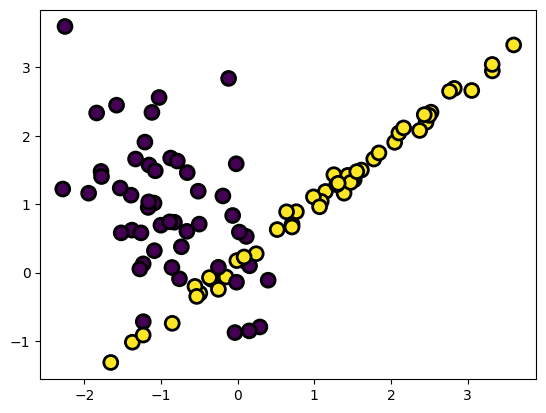

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.show()

In [4]:
X[y==1,:] = -(X[y==0,:])

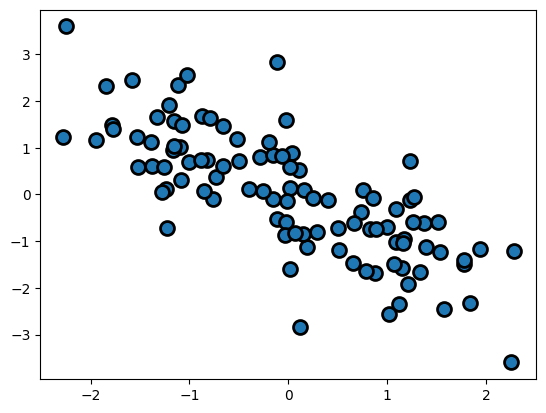

In [5]:
plt.scatter(X[:,0], X[:,1], marker='o', s=100, edgecolor='k', linewidth=2)
plt.show()

### QDA

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

,"solver solver: {'svd', 'eigen'}, default='svd'Solver to use, possible values: - 'svd': Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features. - 'eigen': Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.",'svd'
,"shrinkage shrinkage: 'auto' or float, default=NoneShrinkage parameter, possible values: - None: no shrinkage (default). - 'auto': automatic shrinkage using the Ledoit-Wolf lemma. - float between 0 and 1: fixed shrinkage parameter. Enabling shrinkage is expected to improve the model when some classes have a relatively small number of training data points compared to the number of features by mitigating overfitting during the covariance estimation step.This should be left to `None` if `covariance_estimator` is used.Note that shrinkage works only with 'eigen' solver.",None
,"priors priors: array-like of shape (n_classes,), default=NoneClass priors. By default, the class proportions are inferred from thetraining data.",None
,"reg_param reg_param: float, default=0.0Regularizes the per-class covariance estimates by transforming S2 as``S2 = (1 - reg_param) * S2 + reg_param * np.eye(n_features)``,where S2 corresponds to the `scaling_` attribute of a given class.",0.0
,"store_covariance store_covariance: bool, default=FalseIf True, the class covariance matrices are explicitly computed andstored in the `self.covariance_` attribute... versionadded:: 0.17",False
,"tol tol: float, default=1.0e-4Absolute threshold for the covariance matrix to be considered rankdeficient after applying some regularization (see `reg_param`) to each`Sk` where `Sk` represents covariance matrix for k-th class. Thisparameter does not affect the predictions. It controls when a warningis raised if the covariance matrix is not full rank... versionadded:: 0.17",0.0001
,"covariance_estimator covariance_estimator: covariance estimator, default=NoneIf not None, `covariance_estimator` is used to estimate the covariancematrices instead of relying on the empirical covariance estimator(with potential shrinkage). The object should have a fit method anda ``covariance_`` attribute like the estimators in:mod:`sklearn.covariance`. If None the shrinkage parameter drives theestimate.This should be left to `None` if `shrinkage` is used.Note that `covariance_estimator` works only with the 'eigen' solver.",None


In [7]:
x = [[0, 0]]
p = model.predict_proba(x)[0]
print(p)

[0.5 0.5]


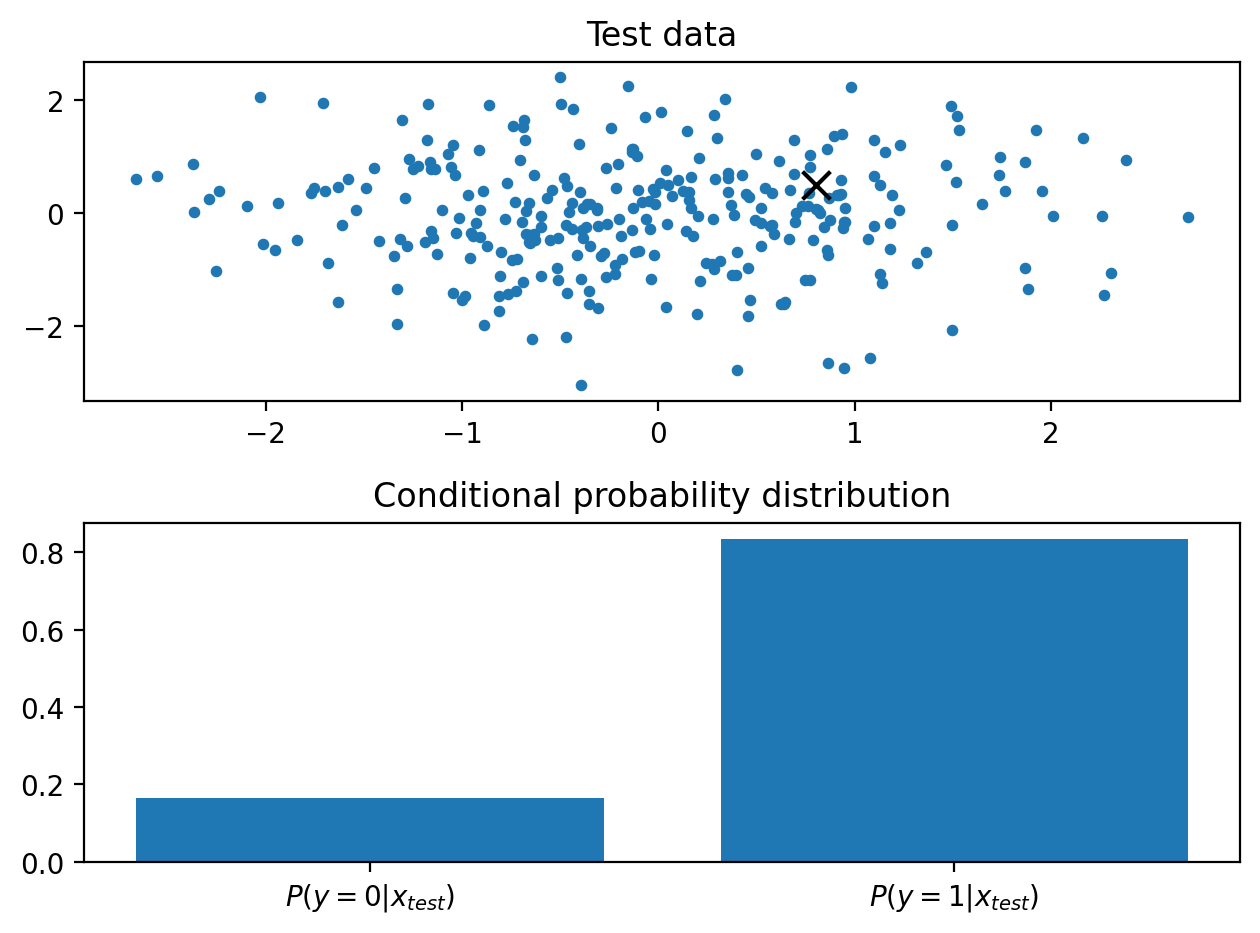

In [57]:
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")

plt.subplot(212)  #  2행 1열로 만들고 1번째 위치에 그리기
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

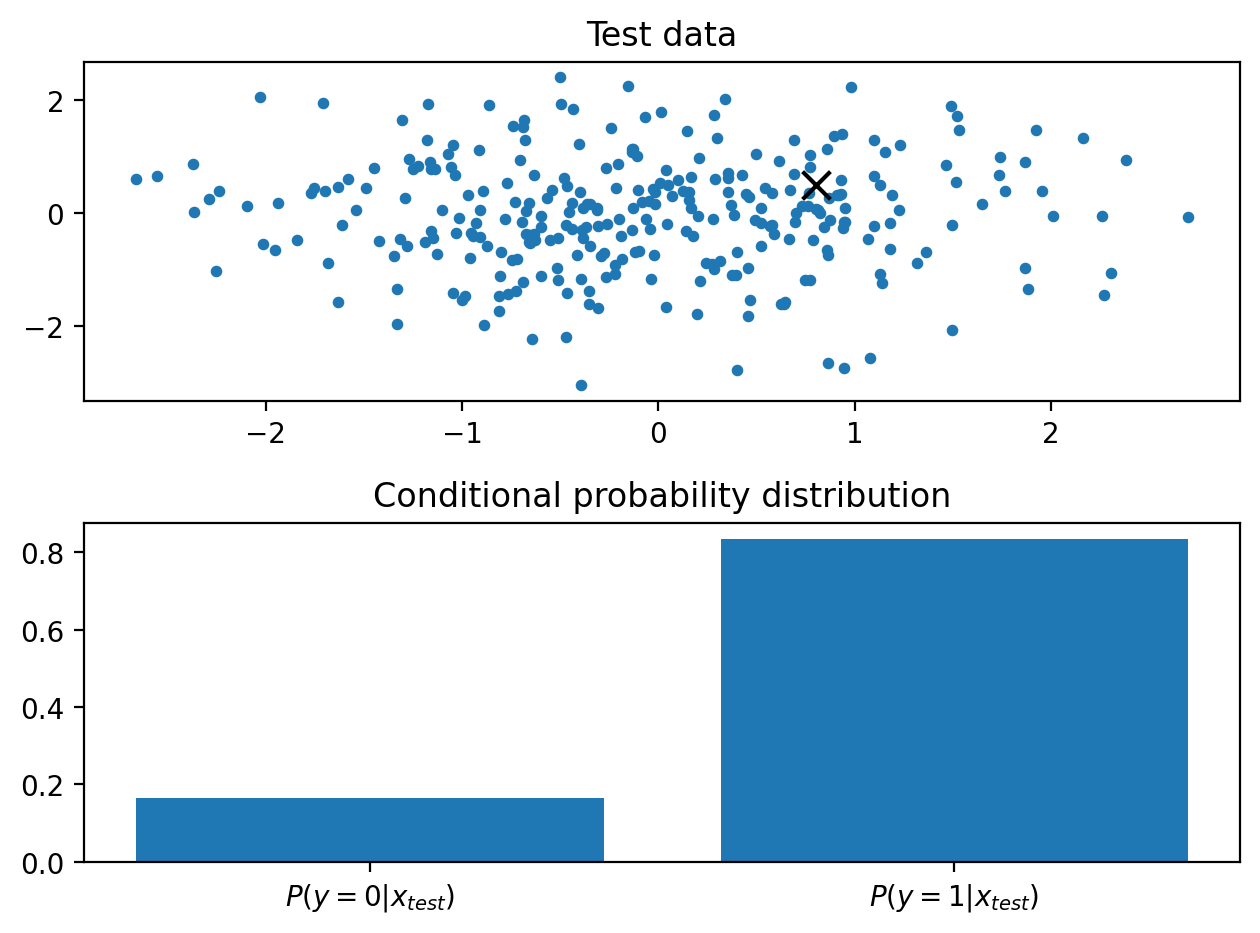

[9.99914247e-01 8.57529700e-05]


In [62]:


plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$",
                            "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show() 

# move test point away from center
x = [[0.8, 0.5]]

model = SVC(probability=True)
model.fit(X, Y)
p = model.predict_proba(x)[0]
print(p)

In [63]:
x = [[-0.5, 0]]
p = model.predict_proba(x)[0]
print(p)

[0.4661632 0.5338368]


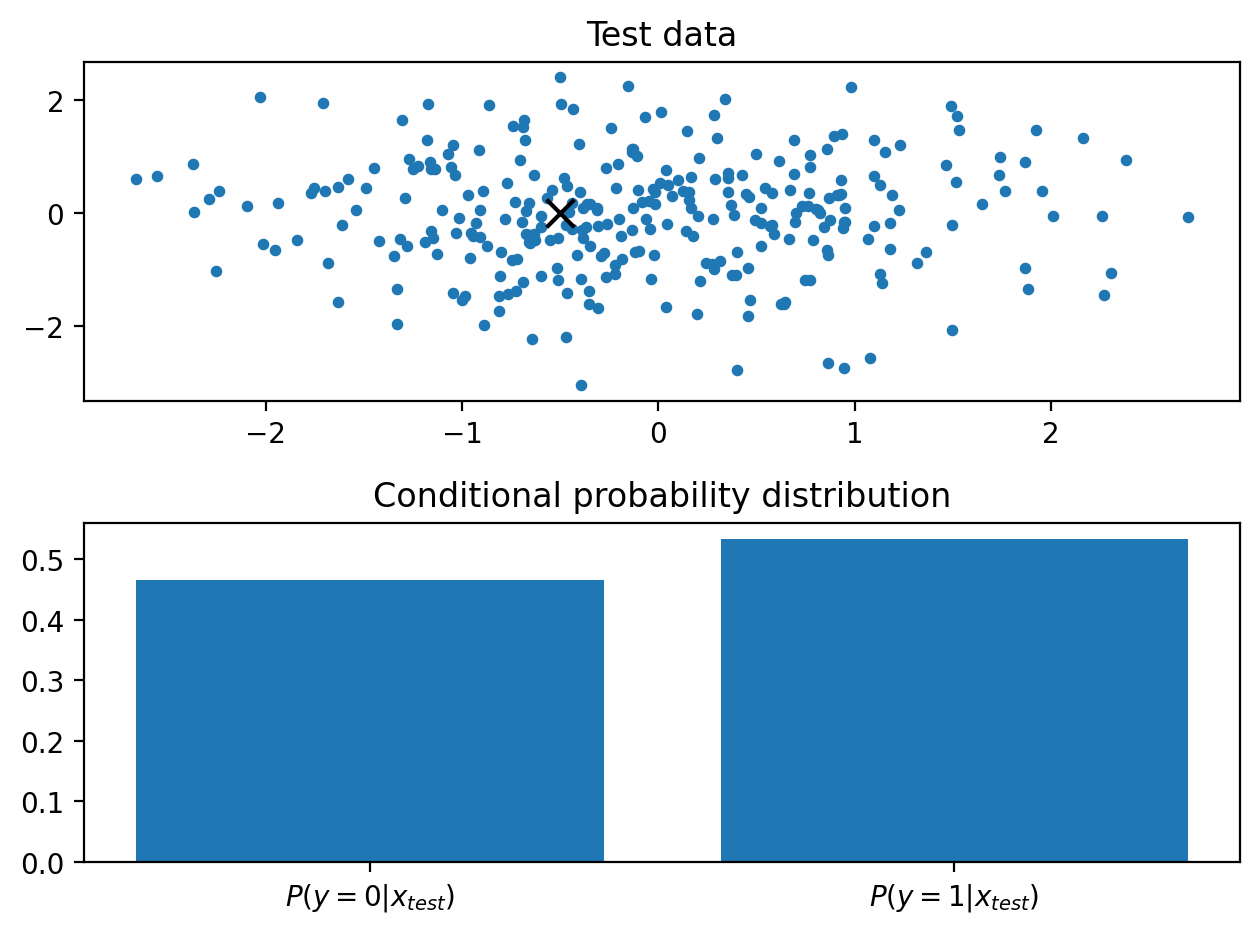

In [64]:
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

In [65]:
x = [[0.5, 0]]
p = model.predict_proba(x)[0]
print(p)

[0.74360286 0.25639714]


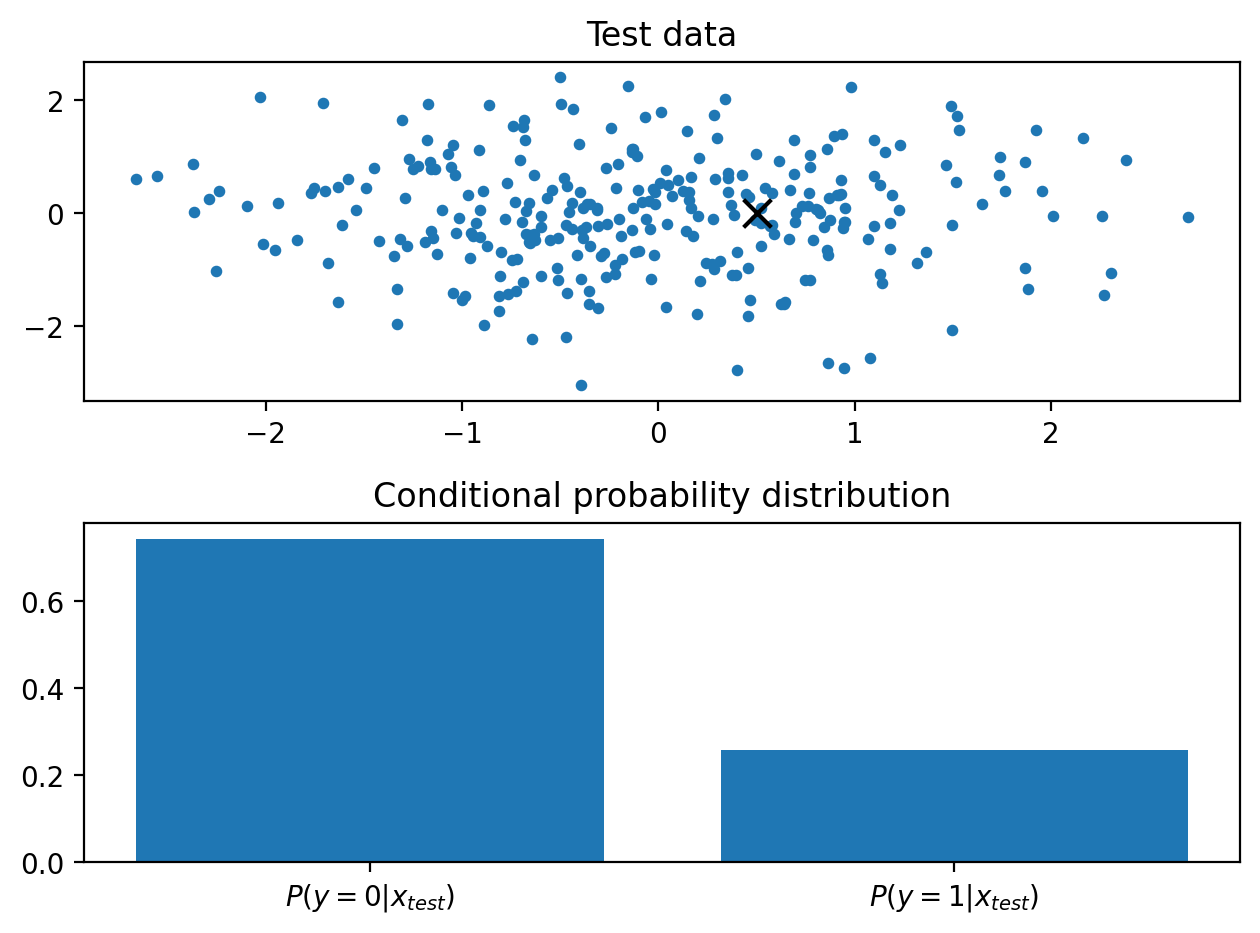

In [66]:
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

## 나이브베이즈 모형

In [68]:
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.iloc[:,:-1]
y = iris.species
print(X.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [69]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [71]:
test_X = [[5.0, 3.4, 1.2, 0.25]]
model.predict(test_X)

d:\ml-data\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array(['setosa'], dtype='<U10')

d:\ml-data\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
d:\ml-data\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


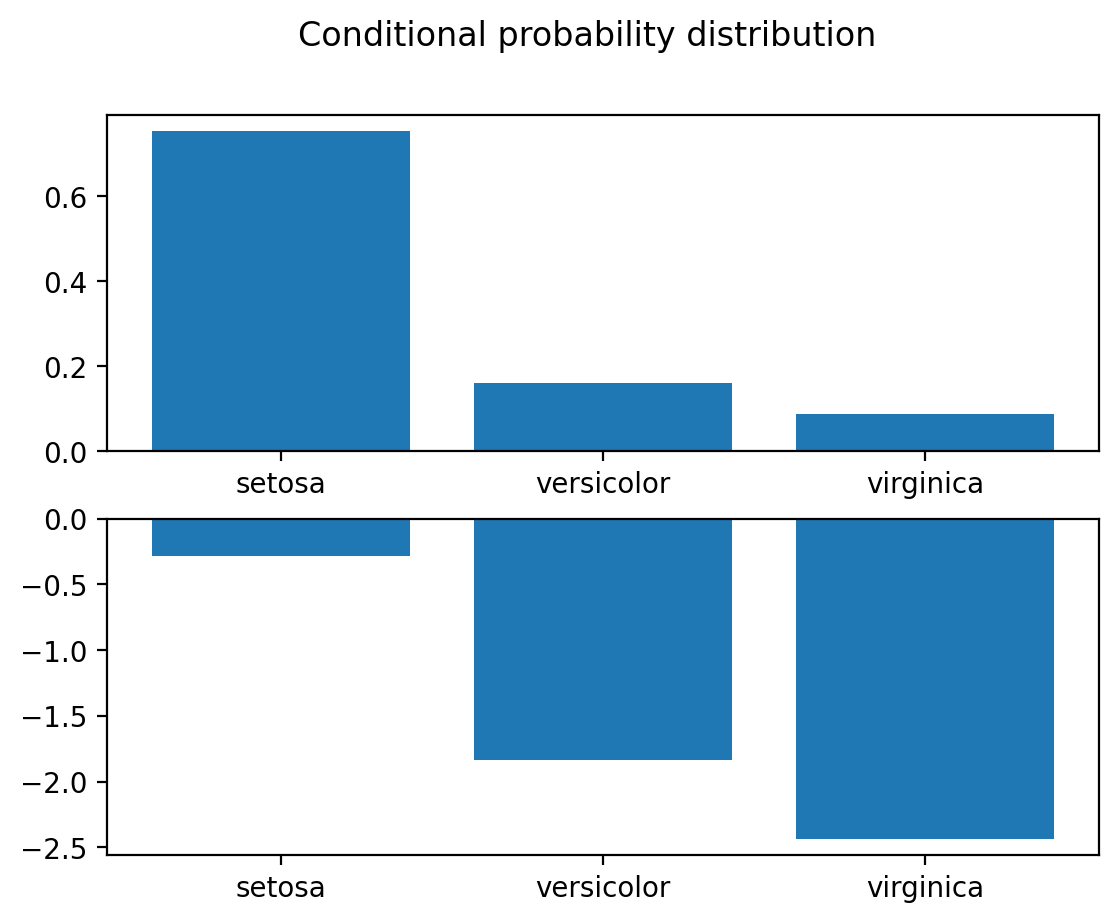

In [72]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.xticks(model.classes_)
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(test_X)[0])
plt.xticks(model.classes_)
plt.suptitle("Conditional probability distribution")
plt.show()

# 확률적 판별 모형

## 로지스틱 회귀

In [98]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1, n_redundant=0,
                           n_informative=1, n_clusters_per_class=1, 
                           random_state=1)
print(X[:5])
print(y[:5])
# plt.scatter(X, y, s=10)
# plt.ylim(-0.1, 1.1)
# plt.yticks([0, 1])
# plt.title("Classification data with one feature")
# plt.show()


[[-1.65902848]
 [-0.64202884]
 [-1.53918976]
 [ 0.65913744]
 [-0.46845764]]
[0 0 0 1 0]


In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)

In [81]:
import numpy as np
xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]

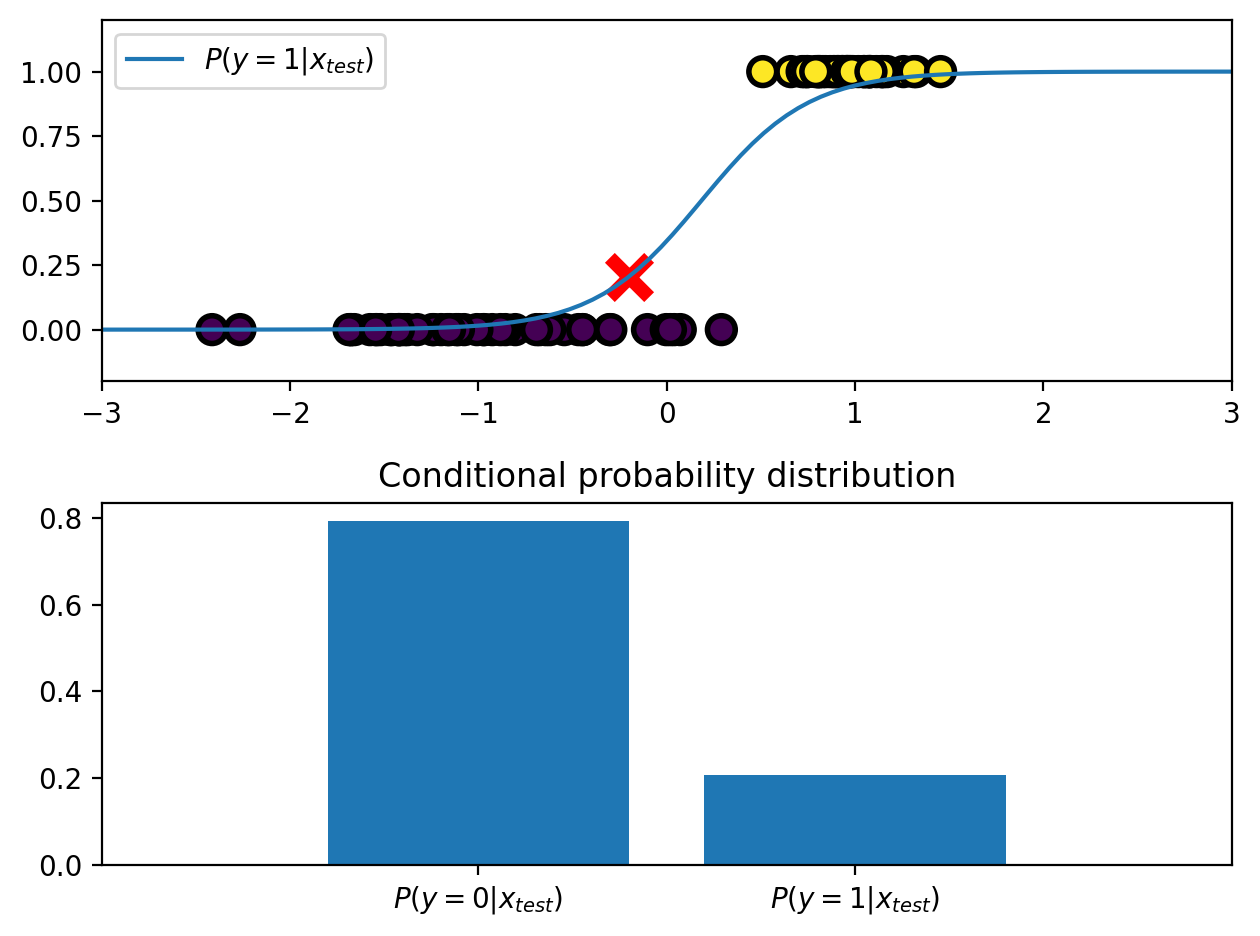

In [82]:
import matplotlib.pyplot as plt

test_X = [[-0.2]]
plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(test_X[0], model.predict_proba(test_X)[0][1:], marker='x', 
            s=200, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.title("Conditional probability distribution")
plt.tight_layout()
plt.show()

In [83]:
model.decision_function(X)
# -6.47675595, -2.90333928, -6.05568042,  1.66854954, -2.29346472,

array([-6.47438263, -2.90266414, -6.05350721,  1.66705201, -2.2930794 ,
        3.76409426, -6.5340281 , -2.21661325, -6.53245791, -9.12455131,
        3.13500993,  2.61555032,  3.02870638, -1.00592738, -5.47949421,
       -4.85535585, -5.01570795, -2.55918877,  1.97281572,  2.460147  ,
       -5.60782045,  2.82982665, -3.47165994, -3.01582592, -4.05026617,
        2.20332427,  2.16696718,  3.45838346, -5.80187631,  0.37063042,
       -0.50904281, -5.634745  ,  2.56677081,  2.77042702,  2.40210092,
        4.00165217, -2.82848545, -5.98307137,  2.62773135, -0.65596236,
        3.9641453 ,  2.6829278 , -3.90066756,  3.39242737,  3.14162334,
       -3.07592562,  2.21199555, -1.71419173, -5.64217592, -0.39610231,
       -2.21502826,  1.91981457,  1.14265373,  1.87731954, -5.53393817,
        2.17403435, -3.65420246,  2.92369219,  3.36727558,  2.47937535,
       -1.6905621 ,  3.26151938, -4.42495293, -5.77157183,  2.63921794,
        2.31434748,  4.45699446,  2.26395301,  3.09896547, -0.57

In [84]:
print(y[:5])

[0 0 0 1 0]


## 의사결정나무

In [85]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, 2:]
y = iris.target
feature_names = iris.feature_names[2:]

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  random_state=0)

In [88]:
dt_model.fit(X, y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [103]:
!pip install pydotplus graphviz
import io
from sklearn.tree import export_graphviz
import pydotplus as pydot
from IPython.core.display import Image

In [104]:
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf,
                    feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

In [105]:
# import numpy as np
# import matplotlib as mpl
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

In [ ]:
# draw_decision_tree(dt_model, 
#                    feature_names=iris.feature_names[2:])

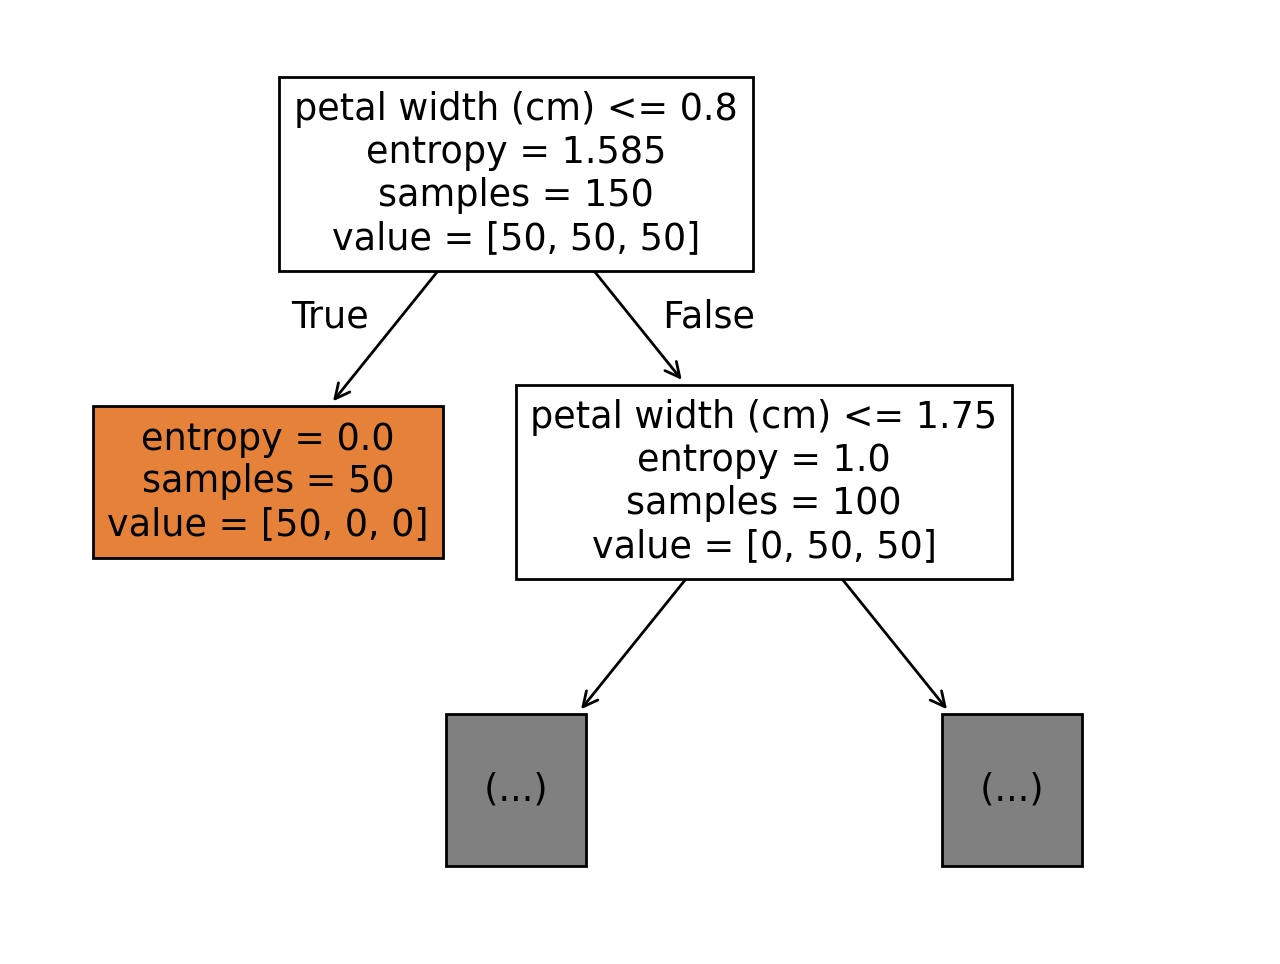

In [93]:
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(8,6))
plot_tree(dt_model, max_depth=1, filled=True, 
          feature_names=iris.feature_names[2:])
plt.show()

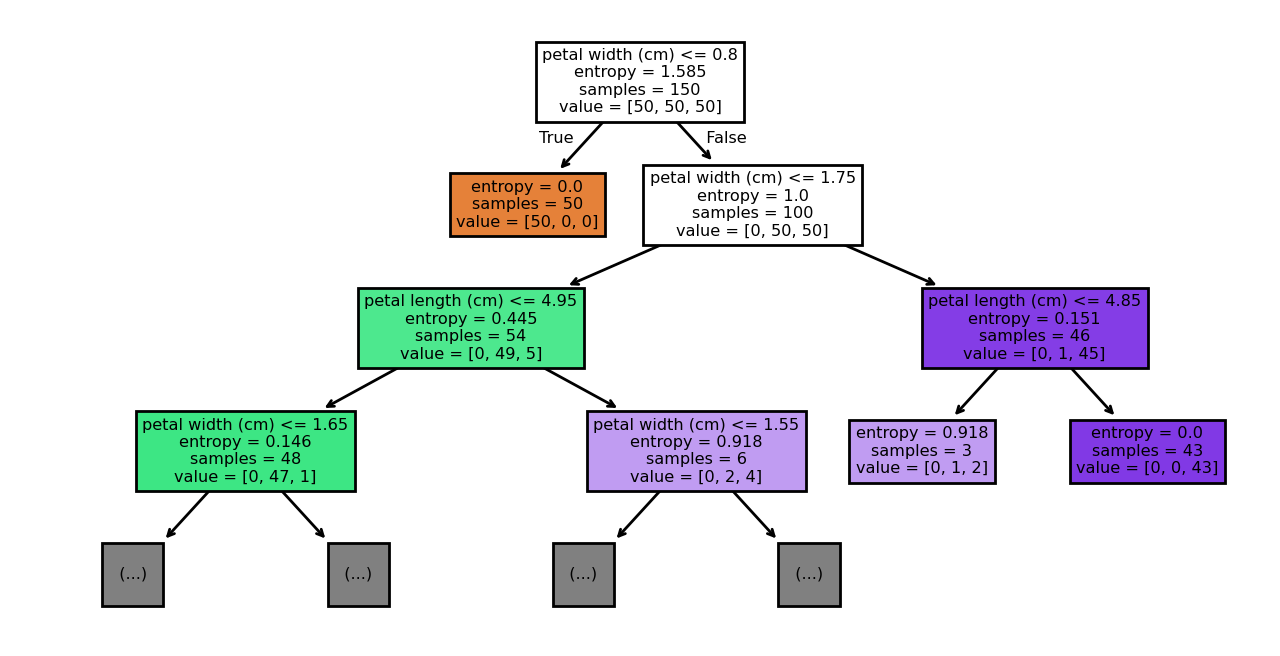

In [94]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(8,4))
plot_tree(dt_model, max_depth=3, filled=True, 
          feature_names=iris.feature_names[2:])
plt.show()

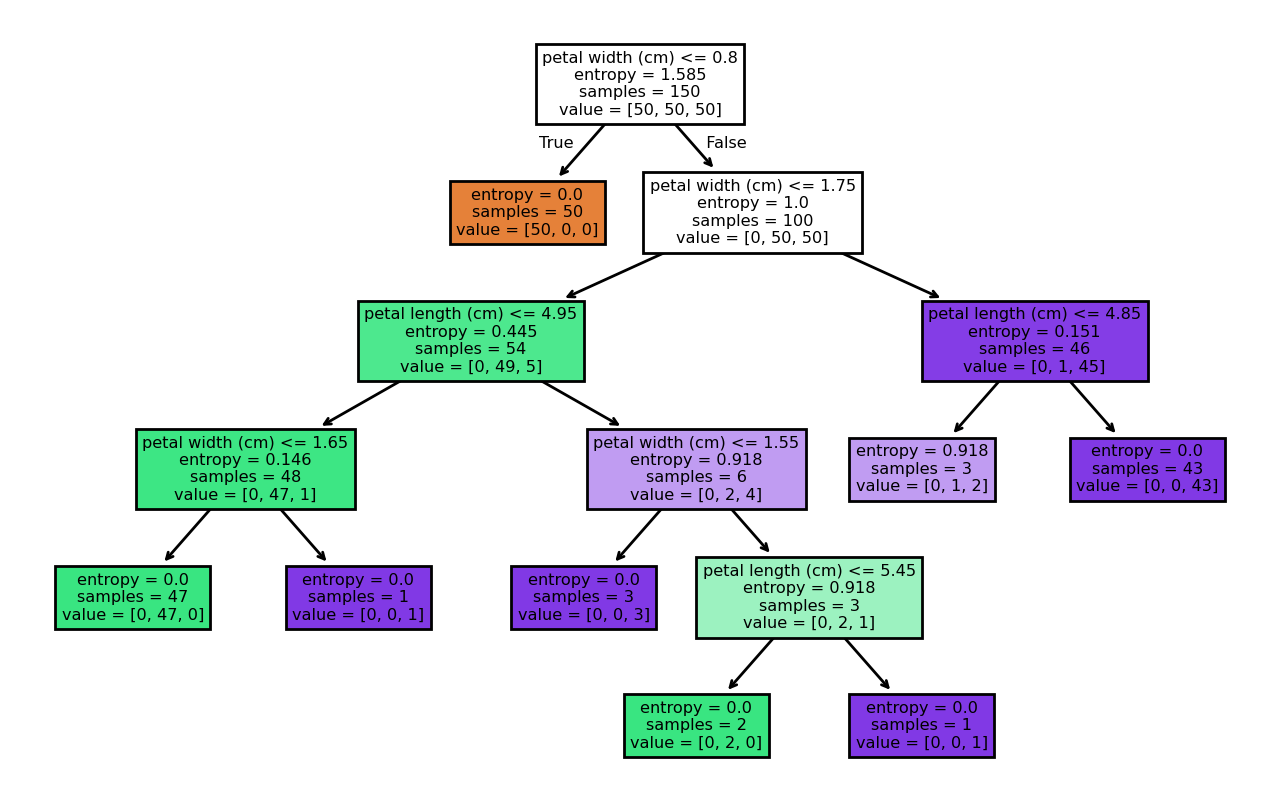

In [95]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(8,5))
plot_tree(dt_model, filled=True, 
          feature_names=iris.feature_names[2:])
plt.show()

# 판별함수 기반 모형

## 퍼셉트론

In [108]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
# idx = np.in1d(iris.target, [0,2]) #1D배열요소가 두 번째 배열에 있는지 확인, Numpy 1.7.0 이후로는 권장되지 않음
idx = np.isin(iris.target, [0,2]) #요소가 두 번째 배열에 있는지 확인, Numpy 1.7.0 이후로는 권장됨
X = iris.data[idx, 0:2]
y = iris.target[idx]

print(X.shape, y.shape) # 선택된 샘플·특징 수 확인
print(np.unique(y)) 

(100, 2) (100,)
[0 2]


In [109]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100, random_state=1).fit(X, y)

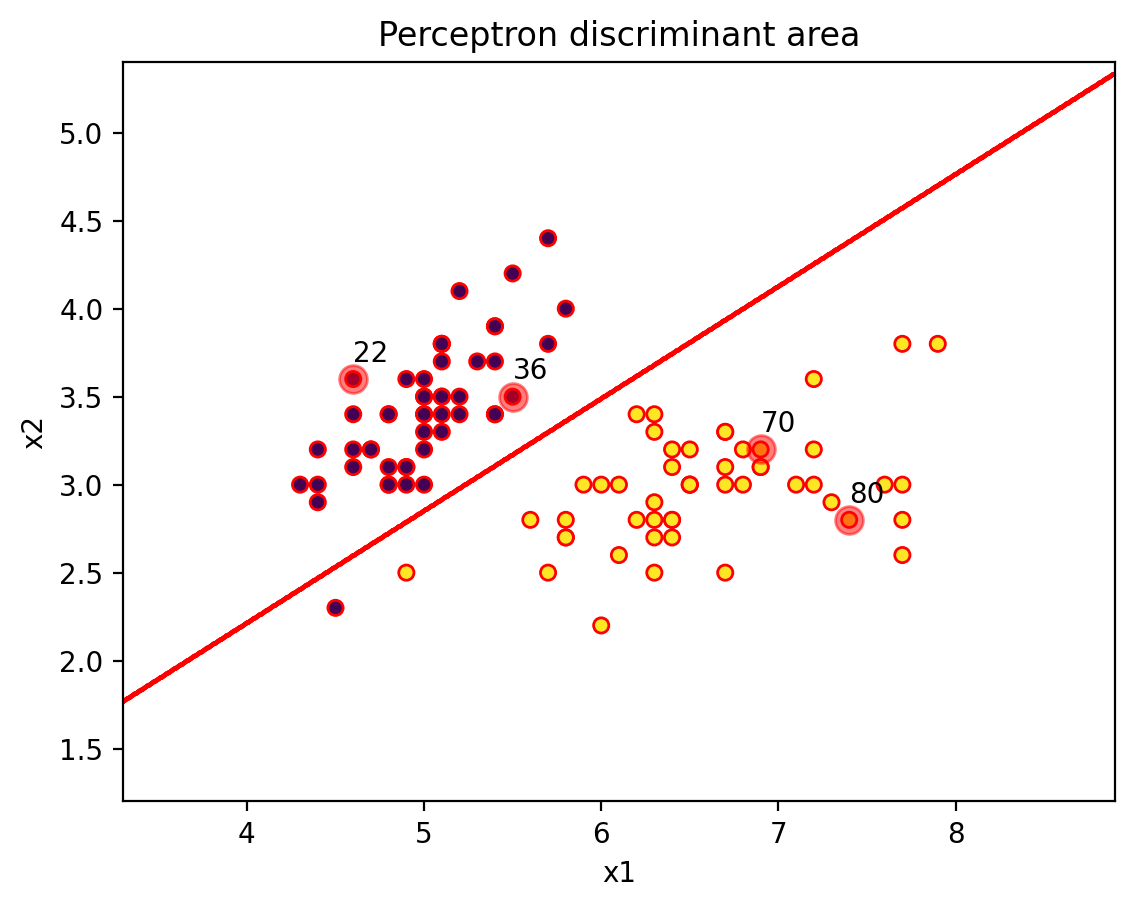

In [110]:
import matplotlib.pyplot as plt

X_min, X_max = X[:, 0].min()-1, X[:, 0].max()+1 # x축 한계
Y_min, Y_max = X[:, 1].min()-1, X[:, 1].max()+1 # y축 한계

# contour() 함수를 이용해 그래프를 그리려면 XX, YY는 2차원여야 함
XX, YY = np.meshgrid(np.linspace(X_min, X_max, 1000),
                     np.linspace(Y_min, Y_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

# contour() 함수는 등고선을 그려줌, x,y,z 매개변수 모두 2차원여야 함
plt.contour(XX, YY, ZZ, colors='r') # 이 예에서는 경계선을 그려줌
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='r', linewidth=1)

idx = [22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1] + 0.1))
plt.title("Perceptron discriminant area")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

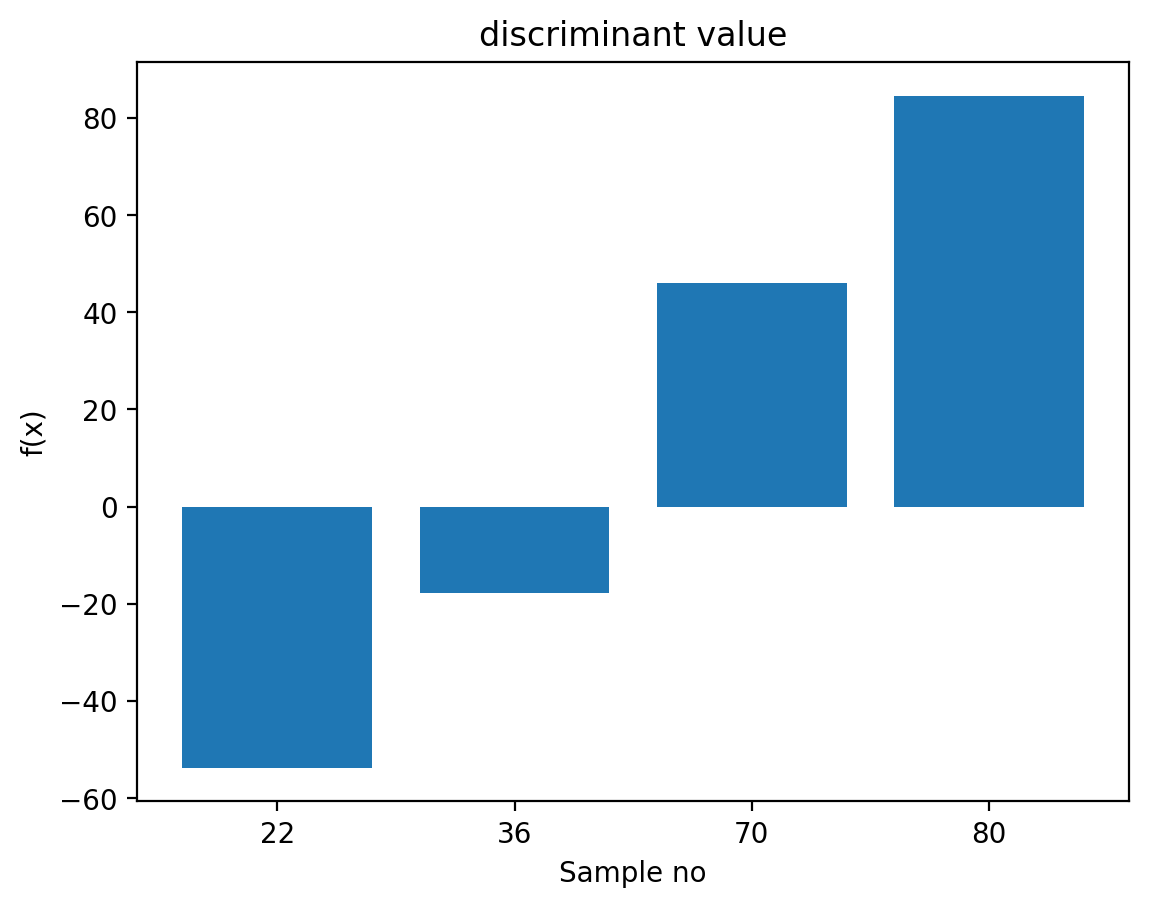

In [37]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.title("discriminant value")
plt.xlabel("Sample no")
plt.ylabel("f(x)")
plt.show()

## 커널 SVM

In [111]:
import numpy as np
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [112]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, Y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [113]:
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

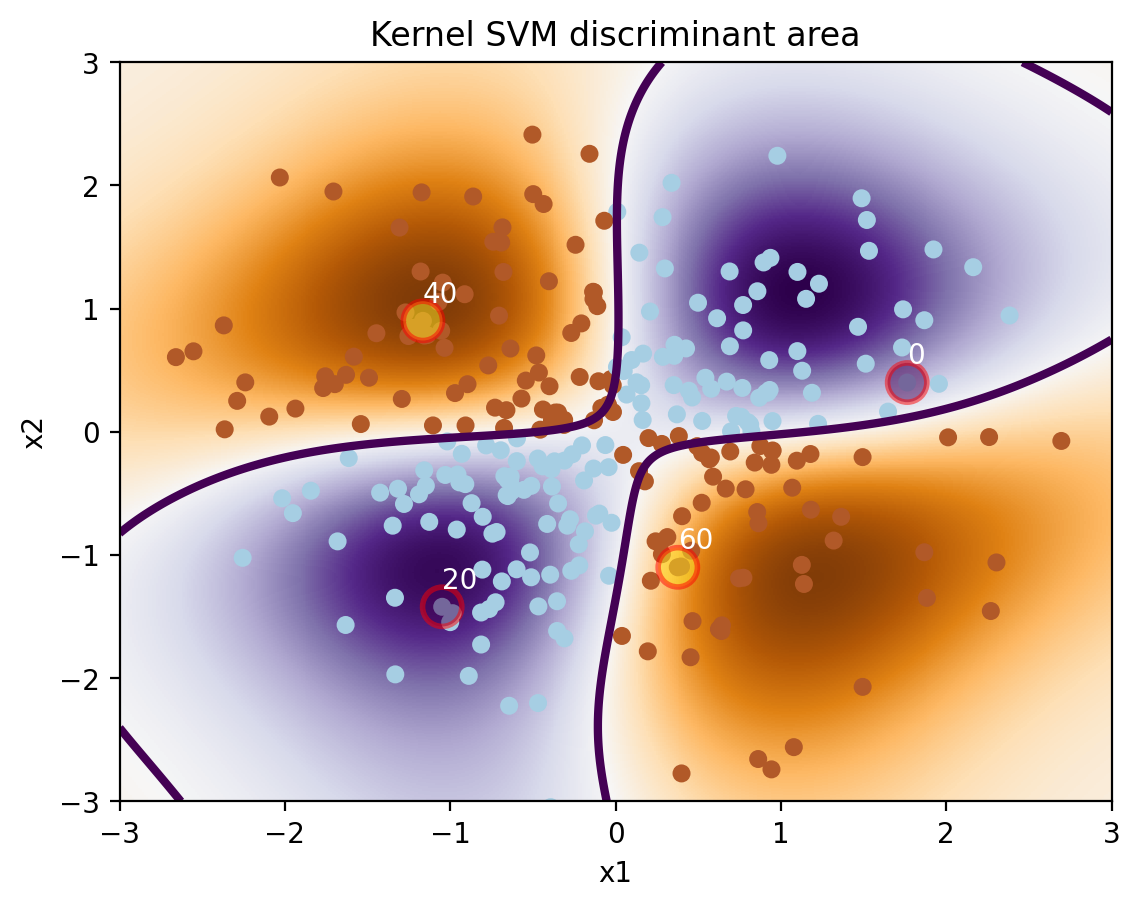

In [114]:
import matplotlib.pyplot as plt
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], 
            s=200, alpha=0.5, edgecolor='r', linewidth=2)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Kernel SVM discriminant area")
plt.show()

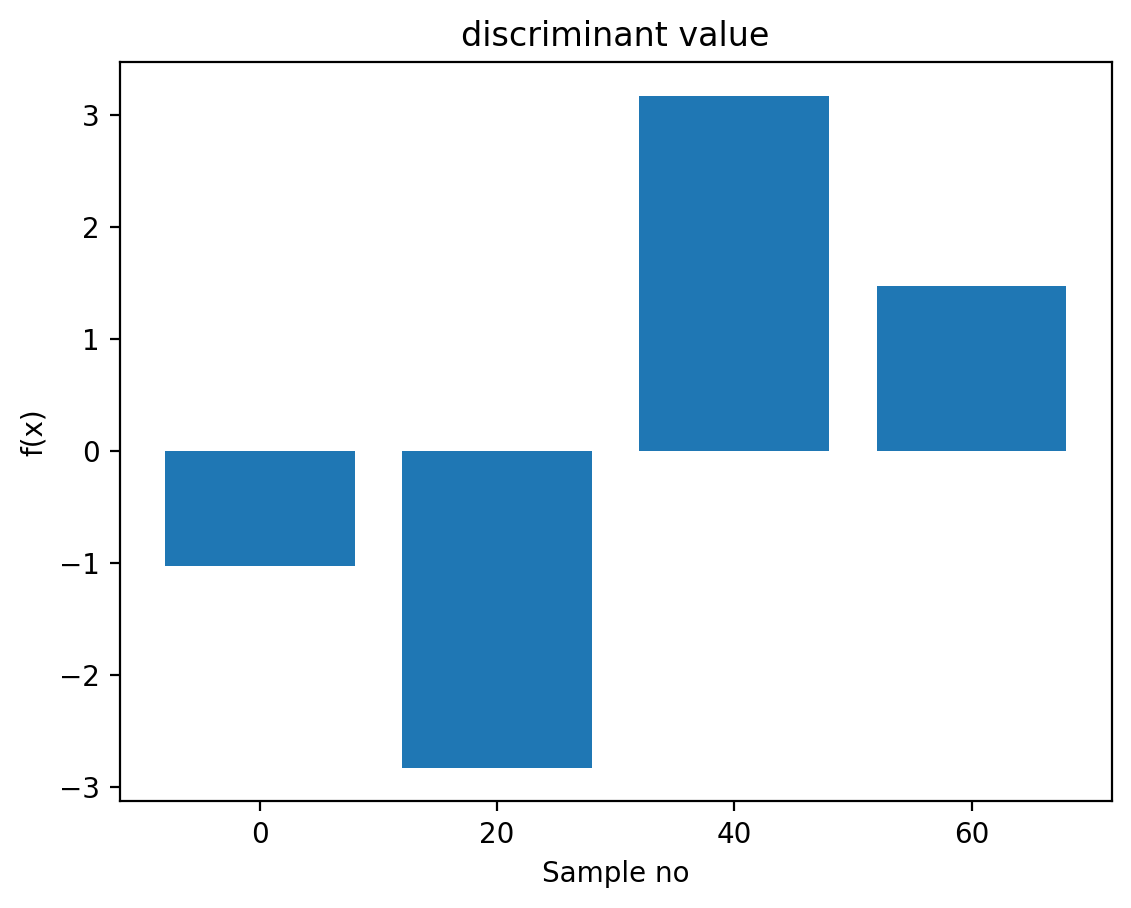

In [115]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.title("discriminant value")
plt.xlabel("Sample no")
plt.ylabel("f(x)")
plt.show()

# 다중 클래스 분류

In [116]:
from sklearn.datasets import load_iris
iris = load_iris()

## OvO

In [117]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

model_ovo = OneVsOneClassifier(LogisticRegression())
model_ovo.fit(iris.data, iris.target)

,"estimator estimator: estimator objectA regressor or a classifier that implements :term:`fit`.When a classifier is passed, :term:`decision_function` will be usedin priority and it will fallback to :term:`predict_proba` if it is notavailable.When a regressor is passed, :term:`predict` is used.",LogisticRegression()
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation: the `n_classes * (n_classes - 1) / 2` OVO problems are computed in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit met

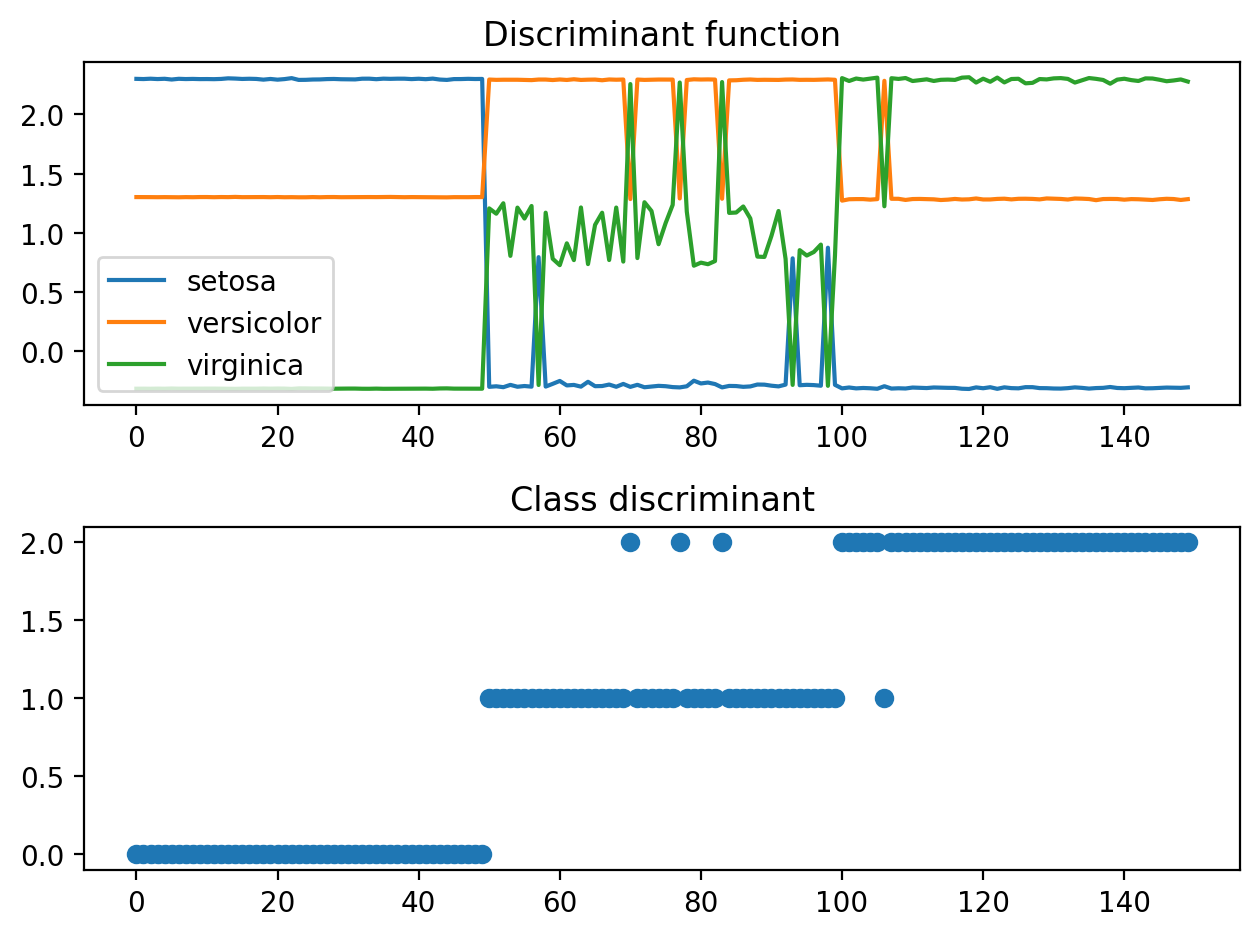

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
disc1 = model_ovo.decision_function(iris.data)
df1 = pd.DataFrame(disc1)
plt.plot(df1)
plt.legend(["setosa", "versicolor", "virginica"])
plt.title("Discriminant function")

ax2 = plt.subplot(212)
disc2 = model_ovo.predict(iris.data)
df2 = pd.DataFrame(disc2, columns=["prediction"])
plt.scatter(range(150), df2)
plt.title("Class discriminant")
plt.tight_layout()
plt.show()

In [119]:
df1.iloc[50:100]

,0,1,2
50,-0.300195,2.293838,1.206064
51,-0.295692,2.291232,1.161350
52,-0.303298,2.292315,1.249407
53,-0.283739,2.292299,0.805431
54,-0.299535,2.292168,1.212782
55,-0.293404,2.290499,1.120506
56,-0.298771,2.289035,1.226485
57,0.794557,2.293900,-0.284648
58,-0.298136,2.293801,1.169818
59,-0.274942,2.289651,0.780732


## OvR

In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model_ovr = OneVsRestClassifier(LogisticRegression())
model_ovr.fit(iris.data, iris.target)

,"estimator estimator: estimator objectA regressor or a classifier that implements :term:`fit`.When a classifier is passed, :term:`decision_function` will be usedin priority and it will fallback to :term:`predict_proba` if it is notavailable.When a regressor is passed, :term:`predict` is used.",LogisticRegression()
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation: the `n_classes`one-vs-rest problems are computed in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: 0.20 `n_jobs` default changed from 1 to None",None
,"verbose verbose: int, default=0The verbosity level, if non zero, progress messages are printed.Below 50, the output is sent to stderr. Otherwise, the output is sentto stdout. The frequency of the messages increases with the verbositylevel, reporting all iterations at 10. See :class:`joblib.Parallel` formore details... versionadded:: 1.1",0
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeight

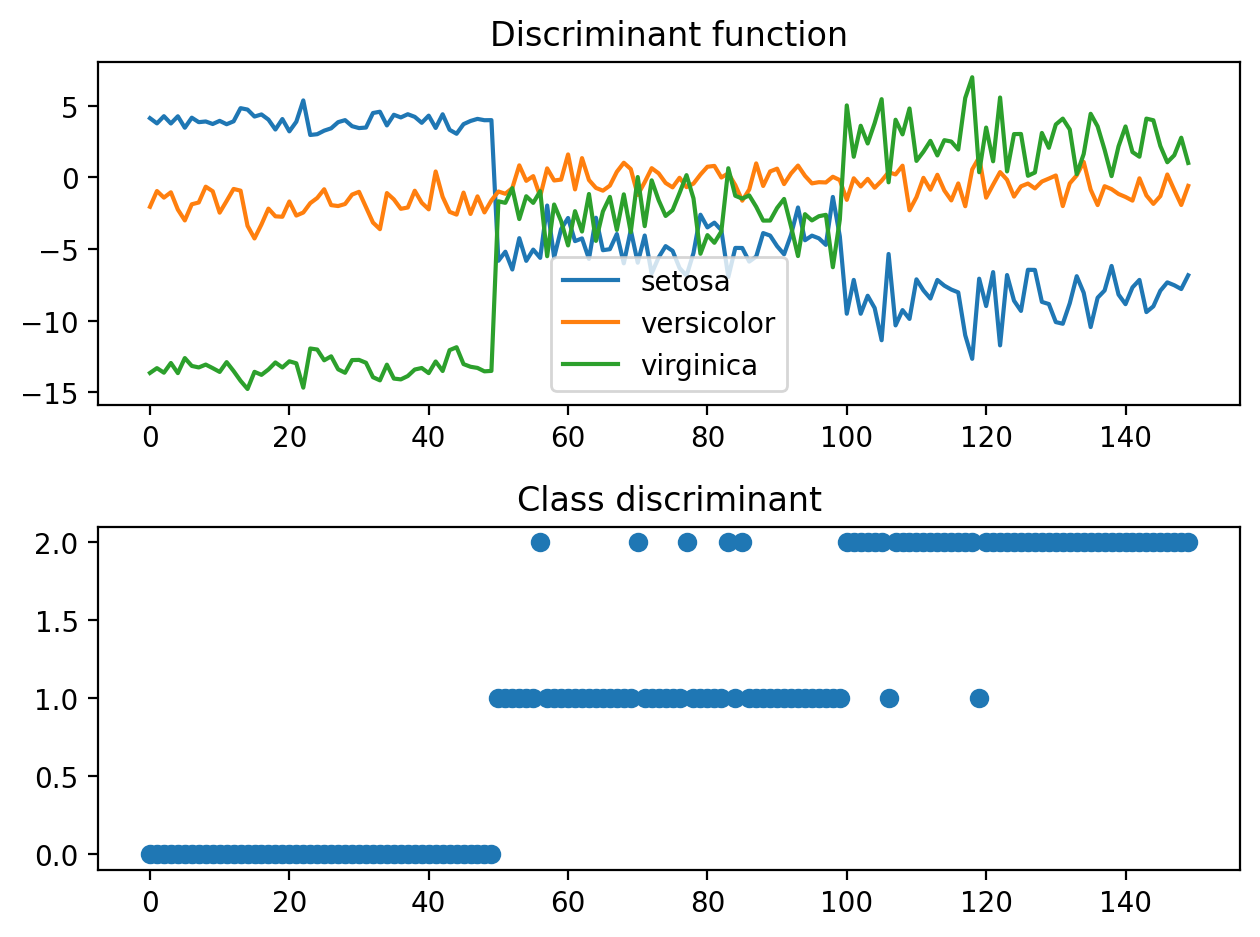

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
disc1 = model_ovr.decision_function(iris.data)
df1 = pd.DataFrame(disc1)
plt.plot(df1)
plt.legend(["setosa", "versicolor", "virginica"])
plt.title("Discriminant function")

ax2 = plt.subplot(212)
disc2 = model_ovr.predict(iris.data)
df2 = pd.DataFrame(disc2, columns=["prediction"])
plt.scatter(range(150), df2)
plt.title("Class discriminant")
plt.tight_layout()
plt.show()